In [100]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (32, 20) # (w, h)
# Remove grid lines
import numpy as np
import cv2

In [97]:
!wget "https://drive.google.com/uc?export=view&id=1FdJqD04_l8n3sFl3QotxOcyH07ndEVm6" -O task3.png

clear_output()

In [102]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()


def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]


def drawContourPoints(arr, image, color):
  for coords in arr:
    cv2.circle(image,(coords[0][0], coords[0][1]), 5, color, -1)

In [115]:
coins = read_and_resize('task3.png')
plt.imshow(coins)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [113]:
def coins_calculator(coins, debug = False):
  #@title Parameters { run: "auto" }
  thresh_val = 200 #@param {type:"slider", min:0, max:255, step:1}
  kernel_size = 25 #@param {type:"slider", min:0, max:50, step:1}

  coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
  coins_gray = cv2.GaussianBlur(coins_gray,(11,11),0)
  coins_gray = cv2.medianBlur(coins_gray,9)

  # Thresholding
  ret,coins_bw = cv2.threshold(coins_gray,thresh_val,255,cv2.THRESH_BINARY)

  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  edited_image = cv2.morphologyEx(coins_bw, cv2.MORPH_OPEN, kernel)

  if debug:
    showInRow([coins_bw, edited_image], ['binary image', 'edited_image'])

  contoursAll, hierarchy = cv2.findContours(edited_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  contours = []
  for i in range(len(contoursAll)):
    if hierarchy[0][i][3] == 1:
      contours.append(contoursAll[i])

  im2 = cv2.drawContours(edited_image, contours, -1, (255, 0, 0))
  img_contours=coins.copy()

  if debug:
    print('Number of contours: {}'.format(len(contours)))

  # draw contours on input image
  cv2.drawContours(img_contours, contours, -1, (255,0,0), 3)

  plt.subplot(132),plt.imshow(img_contours,cmap = 'gray')
  plt.title('Image with contours'), plt.xticks([]), plt.yticks([])
  
  plt.show()

  return len(contours)

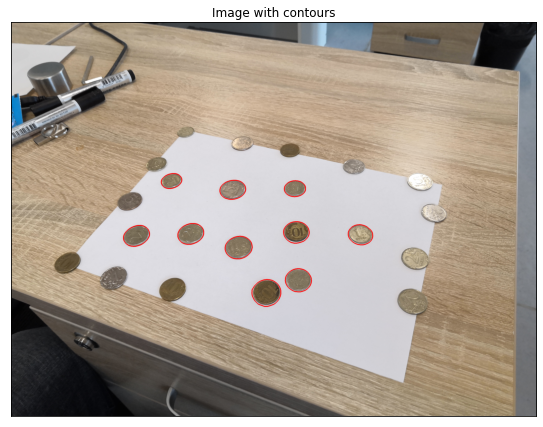

10

In [119]:
#@title Parameters { run: "auto" }
debug = False #@param {type:"boolean"}
coins_calculator(coins, debug)